<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

c:\Users\emirh\anaconda3\envs\tlib\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.1


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. **Collect more data:**  Often, a lack of data is the cause of underfitting. Collecting more data can help the model learn the underlying patterns in the data better.

2. **Increase the complexity of the model:** A simple model may not be able to capture the complexity of the data. Increasing the number of layers or neurons in the model can help it learn more complex patterns.

3. **Use less regularization:** Perhaps your model is underfitting because you're trying to prevent overfitting too much. Holding back on regularization techniques can help your model fit the data better.

extra:
- tweak the learning rate
- Use transfer learning
- Train for longer

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [2]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path /"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")

else:
    print(f"Did not find {image_path} directory, creating...")
    image_path.mkdir(parents=True,exist_ok=True)
# Download data
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

# Unzip data   
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    zip_ref.extractall(image_path) 

Did not find data\pizza_steak_sushi directory, creating...


In [3]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [6]:
# Setup train and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

Random image path: data\pizza_steak_sushi\train\sushi\2574453.jpg
Image class: sushi
Image height: 512
Image width: 512


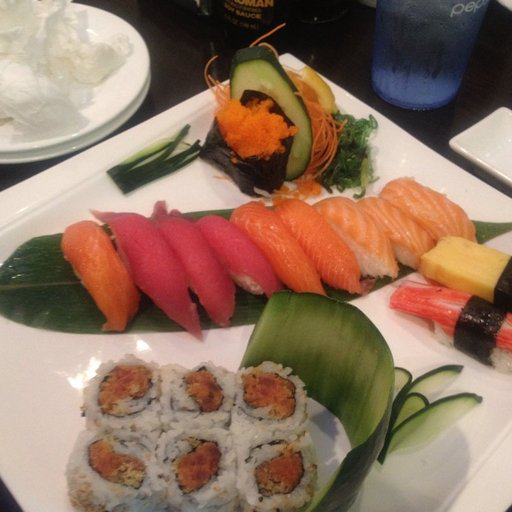

In [7]:
# Visualize an image
import random
from PIL import Image

# Get all images path
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Get random image path
random_image_path = random.choice(image_path_list)

# Get image class from path name
image_class = random_image_path.parent.stem

# Open ımage
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

(-0.5, 511.5, 511.5, -0.5)

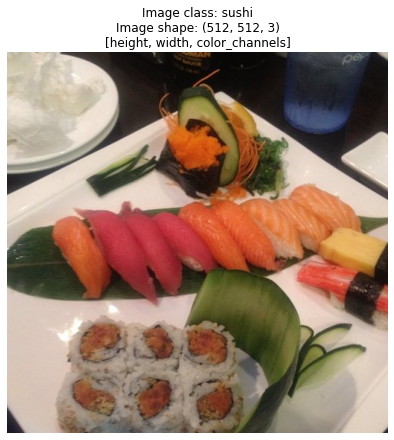

In [9]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

img_array = np.array(img)

plt.figure(figsize=(10,7))
plt.imshow(img_array)
plt.title(f"Image class: {image_class}\nImage shape: {img_array.shape}\n[height, width, color_channels]")
plt.axis(False)


We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [10]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [71]:
# Write transform for turning images into tensors
data_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


In [38]:
# Write a function to plot transformed images
def plot_transformed_images(image_path,transform,n=3,seed=42):
    random.seed(42)
    random_sample_paths =random.sample(image_path,k=n)

    for image_path in random_sample_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nsize: {f.size}")
            ax[0].axis(False)

            img_permuted = transform(f).permute(1,2,0) # for matplotlib

            
            ax[1].imshow(img_permuted)
            ax[1].set_title(f"Original \nsize: {img_permuted.shape}")
            ax[1].axis(False)
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

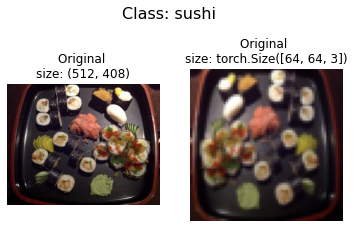

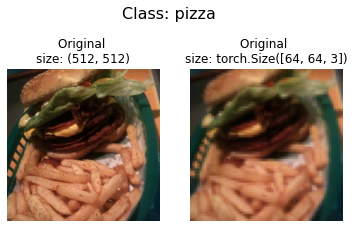

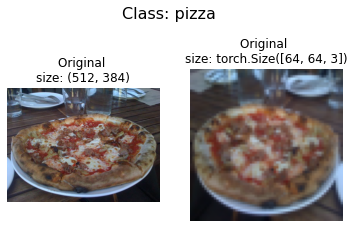

In [39]:
plot_transformed_images(image_path_list,
                        transform=train_transform,
                        n=3)

### Load image data using `ImageFolder`

In [72]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,transform=data_transform)


In [73]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [74]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [75]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [76]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False,num_workers=os.cpu_count())

In [77]:
# How many batches of images are in our data loaders?
len(train_dataloader),len(test_dataloader)

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [78]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Layer 1 shape: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Layer 2 shape: {x.shape}")
        x = self.classifier(x)
        #print(f"Layer 3 shape: {x.shape}")
        return x


In [79]:
model_0 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [80]:
# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[-0.0037,  0.0104,  0.0326]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

## 4. Create training and testing functions for `model_0`.

In [81]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch,(X,y) in enumerate(dataloader):
    # Send data to target device
    X,y = X.to(device),y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
   

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss,train_acc

In [82]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch,(X,y) in enumerate(dataloader):
      # Send data to target device
      X,y = X.to(device),y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred,y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      y_pred_class = y_pred.argmax(dim=1)
      test_acc += (y_pred_class==y).sum().item()/len(y_pred_class)
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [83]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [84]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), 
                             lr=0.001)

model_0_results = train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer)

 20%|██        | 1/5 [00:50<03:20, 50.05s/it]

Epoch: 1 | train_loss: 1.1087 | train_acc: 0.3156 | test_loss: 1.0970 | test_acc: 0.4133


 40%|████      | 2/5 [01:24<02:02, 40.80s/it]

Epoch: 2 | train_loss: 1.0979 | train_acc: 0.3511 | test_loss: 1.0944 | test_acc: 0.4667


 60%|██████    | 3/5 [01:58<01:15, 37.57s/it]

Epoch: 3 | train_loss: 1.0514 | train_acc: 0.5467 | test_loss: 0.9977 | test_acc: 0.4400


 80%|████████  | 4/5 [02:31<00:36, 36.01s/it]

Epoch: 4 | train_loss: 0.9614 | train_acc: 0.5733 | test_loss: 0.9674 | test_acc: 0.4400


100%|██████████| 5/5 [03:05<00:00, 37.02s/it]

Epoch: 5 | train_loss: 0.9210 | train_acc: 0.6133 | test_loss: 0.9376 | test_acc: 0.4667


In [69]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), 
                             lr=0.001)

model_1_results = train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,epochs=20)

  5%|▌         | 1/20 [00:47<14:56, 47.20s/it]

Epoch: 1 | train_loss: 0.6092 | train_acc: 0.7689 | test_loss: 1.0554 | test_acc: 0.4400


 10%|█         | 2/20 [01:32<13:45, 45.84s/it]

Epoch: 2 | train_loss: 0.6267 | train_acc: 0.7378 | test_loss: 1.0554 | test_acc: 0.4400


 15%|█▌        | 3/20 [02:18<13:02, 46.03s/it]

Epoch: 3 | train_loss: 0.6156 | train_acc: 0.7378 | test_loss: 1.0554 | test_acc: 0.4400


 20%|██        | 4/20 [03:05<12:21, 46.34s/it]

Epoch: 4 | train_loss: 0.6312 | train_acc: 0.7333 | test_loss: 1.0554 | test_acc: 0.4400


 25%|██▌       | 5/20 [03:49<11:26, 45.78s/it]

Epoch: 5 | train_loss: 0.6145 | train_acc: 0.7289 | test_loss: 1.0554 | test_acc: 0.4400


 30%|███       | 6/20 [04:36<10:46, 46.21s/it]

Epoch: 6 | train_loss: 0.6092 | train_acc: 0.7644 | test_loss: 1.0554 | test_acc: 0.4400


 35%|███▌      | 7/20 [05:26<10:14, 47.28s/it]

Epoch: 7 | train_loss: 0.6114 | train_acc: 0.7422 | test_loss: 1.0554 | test_acc: 0.4400


 40%|████      | 8/20 [06:04<08:51, 44.33s/it]

Epoch: 8 | train_loss: 0.6103 | train_acc: 0.7556 | test_loss: 1.0554 | test_acc: 0.4400


 45%|████▌     | 9/20 [06:26<06:49, 37.24s/it]

Epoch: 9 | train_loss: 0.6178 | train_acc: 0.7511 | test_loss: 1.0554 | test_acc: 0.4400


 50%|█████     | 10/20 [06:47<05:22, 32.29s/it]

Epoch: 10 | train_loss: 0.6077 | train_acc: 0.7689 | test_loss: 1.0554 | test_acc: 0.4400


 55%|█████▌    | 11/20 [07:08<04:20, 28.97s/it]

Epoch: 11 | train_loss: 0.6204 | train_acc: 0.7511 | test_loss: 1.0554 | test_acc: 0.4400


 60%|██████    | 12/20 [07:29<03:31, 26.47s/it]

Epoch: 12 | train_loss: 0.6159 | train_acc: 0.7422 | test_loss: 1.0554 | test_acc: 0.4400


 65%|██████▌   | 13/20 [07:52<02:56, 25.26s/it]

Epoch: 13 | train_loss: 0.6187 | train_acc: 0.7467 | test_loss: 1.0554 | test_acc: 0.4400


 70%|███████   | 14/20 [08:36<03:06, 31.12s/it]

Epoch: 14 | train_loss: 0.6135 | train_acc: 0.7600 | test_loss: 1.0554 | test_acc: 0.4400


 75%|███████▌  | 15/20 [09:27<03:05, 37.14s/it]

Epoch: 15 | train_loss: 0.6202 | train_acc: 0.7467 | test_loss: 1.0554 | test_acc: 0.4400


 80%|████████  | 16/20 [10:21<02:48, 42.03s/it]

Epoch: 16 | train_loss: 0.6119 | train_acc: 0.7467 | test_loss: 1.0554 | test_acc: 0.4400


 85%|████████▌ | 17/20 [11:16<02:18, 46.17s/it]

Epoch: 17 | train_loss: 0.6005 | train_acc: 0.7378 | test_loss: 1.0554 | test_acc: 0.4400


 90%|█████████ | 18/20 [11:57<01:28, 44.42s/it]

Epoch: 18 | train_loss: 0.6119 | train_acc: 0.7467 | test_loss: 1.0554 | test_acc: 0.4400


 95%|█████████▌| 19/20 [12:20<00:38, 38.07s/it]

Epoch: 19 | train_loss: 0.6216 | train_acc: 0.7467 | test_loss: 1.0554 | test_acc: 0.4400


100%|██████████| 20/20 [13:03<00:00, 39.15s/it]

Epoch: 20 | train_loss: 0.6129 | train_acc: 0.7556 | test_loss: 1.0554 | test_acc: 0.4400


In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), 
                             lr=0.001)

model_2_results=train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,epochs=50)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [86]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=32, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  5%|▌         | 1/20 [00:20<06:33, 20.71s/it]

Epoch: 1 | train_loss: 1.1297 | train_acc: 0.3333 | test_loss: 1.0959 | test_acc: 0.4133


 10%|█         | 2/20 [00:40<06:03, 20.21s/it]

Epoch: 2 | train_loss: 1.0754 | train_acc: 0.4311 | test_loss: 1.0862 | test_acc: 0.4133


 15%|█▌        | 3/20 [01:00<05:42, 20.16s/it]

Epoch: 3 | train_loss: 1.0990 | train_acc: 0.3556 | test_loss: 1.0890 | test_acc: 0.3067


 20%|██        | 4/20 [01:20<05:20, 20.05s/it]

Epoch: 4 | train_loss: 1.0555 | train_acc: 0.4444 | test_loss: 1.0228 | test_acc: 0.4667


 25%|██▌       | 5/20 [01:40<05:00, 20.03s/it]

Epoch: 5 | train_loss: 0.9983 | train_acc: 0.4933 | test_loss: 0.9856 | test_acc: 0.4667


 30%|███       | 6/20 [02:00<04:39, 19.97s/it]

Epoch: 6 | train_loss: 0.9191 | train_acc: 0.6089 | test_loss: 1.0026 | test_acc: 0.4400


 35%|███▌      | 7/20 [02:31<05:06, 23.60s/it]

Epoch: 7 | train_loss: 0.8587 | train_acc: 0.6356 | test_loss: 0.9804 | test_acc: 0.4267


 40%|████      | 8/20 [03:12<05:49, 29.08s/it]

Epoch: 8 | train_loss: 0.8502 | train_acc: 0.6444 | test_loss: 1.0456 | test_acc: 0.4667


 45%|████▌     | 9/20 [03:45<05:33, 30.34s/it]

Epoch: 9 | train_loss: 0.7923 | train_acc: 0.6400 | test_loss: 1.0340 | test_acc: 0.4000


 50%|█████     | 10/20 [04:17<05:09, 30.98s/it]

Epoch: 10 | train_loss: 0.7781 | train_acc: 0.6444 | test_loss: 0.9353 | test_acc: 0.4933


 55%|█████▌    | 11/20 [04:49<04:40, 31.18s/it]

Epoch: 11 | train_loss: 0.7500 | train_acc: 0.6667 | test_loss: 1.0715 | test_acc: 0.4800


 60%|██████    | 12/20 [05:21<04:10, 31.35s/it]

Epoch: 12 | train_loss: 0.7461 | train_acc: 0.6667 | test_loss: 1.1031 | test_acc: 0.4400


 65%|██████▌   | 13/20 [05:53<03:40, 31.56s/it]

Epoch: 13 | train_loss: 0.7047 | train_acc: 0.7156 | test_loss: 1.0225 | test_acc: 0.4667


 70%|███████   | 14/20 [06:27<03:14, 32.38s/it]

Epoch: 14 | train_loss: 0.6759 | train_acc: 0.6933 | test_loss: 1.0931 | test_acc: 0.5467


 75%|███████▌  | 15/20 [06:56<02:36, 31.31s/it]

Epoch: 15 | train_loss: 0.6263 | train_acc: 0.7467 | test_loss: 1.2474 | test_acc: 0.5067


 80%|████████  | 16/20 [07:18<01:54, 28.52s/it]

Epoch: 16 | train_loss: 0.5582 | train_acc: 0.7467 | test_loss: 1.3456 | test_acc: 0.4133


 85%|████████▌ | 17/20 [07:40<01:19, 26.59s/it]

Epoch: 17 | train_loss: 0.5234 | train_acc: 0.7911 | test_loss: 1.2416 | test_acc: 0.5333


 90%|█████████ | 18/20 [08:04<00:51, 25.77s/it]

Epoch: 18 | train_loss: 0.4653 | train_acc: 0.8267 | test_loss: 1.4193 | test_acc: 0.4533


 95%|█████████▌| 19/20 [08:42<00:29, 29.48s/it]

Epoch: 19 | train_loss: 0.4579 | train_acc: 0.8133 | test_loss: 1.3527 | test_acc: 0.4533


100%|██████████| 20/20 [09:13<00:00, 27.68s/it]

Epoch: 20 | train_loss: 0.3947 | train_acc: 0.8222 | test_loss: 1.6284 | test_acc: 0.4667


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [87]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [88]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [89]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [90]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent, 
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)


In [91]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) 

  5%|▌         | 1/20 [00:20<06:25, 20.28s/it]

Epoch: 1 | train_loss: 1.1044 | train_acc: 0.3333 | test_loss: 1.1013 | test_acc: 0.2875


 10%|█         | 2/20 [00:41<06:15, 20.89s/it]

Epoch: 2 | train_loss: 1.0900 | train_acc: 0.3521 | test_loss: 1.0842 | test_acc: 0.2938


 15%|█▌        | 3/20 [01:04<06:13, 21.96s/it]

Epoch: 3 | train_loss: 1.0470 | train_acc: 0.3979 | test_loss: 1.0014 | test_acc: 0.4085


 20%|██        | 4/20 [01:26<05:51, 21.98s/it]

Epoch: 4 | train_loss: 0.9293 | train_acc: 0.5604 | test_loss: 0.9335 | test_acc: 0.5648


 25%|██▌       | 5/20 [01:55<06:05, 24.36s/it]

Epoch: 5 | train_loss: 0.8794 | train_acc: 0.5979 | test_loss: 0.9308 | test_acc: 0.5085


 30%|███       | 6/20 [02:33<06:46, 29.03s/it]

Epoch: 6 | train_loss: 0.8130 | train_acc: 0.6583 | test_loss: 0.9862 | test_acc: 0.5614


 35%|███▌      | 7/20 [03:11<06:54, 31.89s/it]

Epoch: 7 | train_loss: 0.8647 | train_acc: 0.6167 | test_loss: 0.8775 | test_acc: 0.5943


 40%|████      | 8/20 [03:42<06:19, 31.60s/it]

Epoch: 8 | train_loss: 0.7585 | train_acc: 0.6750 | test_loss: 0.8546 | test_acc: 0.6568


 45%|████▌     | 9/20 [04:11<05:40, 30.98s/it]

Epoch: 9 | train_loss: 0.7390 | train_acc: 0.6833 | test_loss: 0.8843 | test_acc: 0.5955


 50%|█████     | 10/20 [04:37<04:52, 29.25s/it]

Epoch: 10 | train_loss: 0.7374 | train_acc: 0.6792 | test_loss: 0.8956 | test_acc: 0.6193


 55%|█████▌    | 11/20 [04:59<04:03, 27.03s/it]

Epoch: 11 | train_loss: 0.6785 | train_acc: 0.7333 | test_loss: 0.8874 | test_acc: 0.6784


 60%|██████    | 12/20 [05:22<03:25, 25.74s/it]

Epoch: 12 | train_loss: 0.6373 | train_acc: 0.7125 | test_loss: 0.9192 | test_acc: 0.6165


 65%|██████▌   | 13/20 [05:44<02:54, 24.89s/it]

Epoch: 13 | train_loss: 0.5462 | train_acc: 0.7729 | test_loss: 0.8918 | test_acc: 0.6398


 70%|███████   | 14/20 [06:15<02:39, 26.51s/it]

Epoch: 14 | train_loss: 0.5079 | train_acc: 0.8083 | test_loss: 1.0988 | test_acc: 0.5699


 75%|███████▌  | 15/20 [06:43<02:15, 27.12s/it]

Epoch: 15 | train_loss: 0.4615 | train_acc: 0.8063 | test_loss: 1.0451 | test_acc: 0.6068


 80%|████████  | 16/20 [07:13<01:51, 27.92s/it]

Epoch: 16 | train_loss: 0.4095 | train_acc: 0.8542 | test_loss: 0.9679 | test_acc: 0.6165


 85%|████████▌ | 17/20 [07:42<01:24, 28.23s/it]

Epoch: 17 | train_loss: 0.3974 | train_acc: 0.8167 | test_loss: 1.2812 | test_acc: 0.5761


 90%|█████████ | 18/20 [08:11<00:57, 28.55s/it]

Epoch: 18 | train_loss: 0.3292 | train_acc: 0.8750 | test_loss: 1.1856 | test_acc: 0.5960


 95%|█████████▌| 19/20 [08:41<00:28, 28.77s/it]

Epoch: 19 | train_loss: 0.2754 | train_acc: 0.8917 | test_loss: 1.2018 | test_acc: 0.5489


100%|██████████| 20/20 [09:10<00:00, 27.55s/it]

Epoch: 20 | train_loss: 0.2654 | train_acc: 0.9083 | test_loss: 1.2341 | test_acc: 0.5591


## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [92]:
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [93]:
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

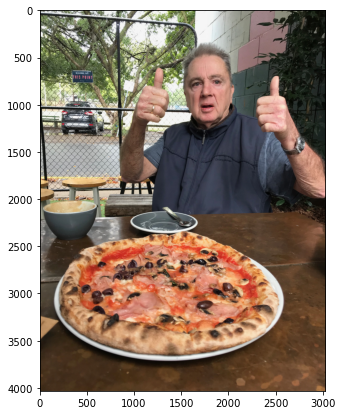

In [94]:
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))

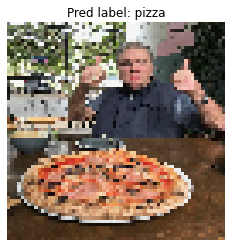

In [95]:
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_4(batch) 

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);